<a href="https://colab.research.google.com/github/FedeYB/Laboratorio_Clustering/blob/main/Laboratorio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>LABORATORIO DE CLUSTERING</h1>
<h2>Grupo 3</h2>
<h2>Integrantes: Facundo Ezequiel Araujo, Carlos Andrés Fernandes, Federico Román Villacorta, Marcelo Javier Ifrán</h2>

#Conexion con el drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Bibliotecas

In [95]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px
import us

In [96]:
pip install us

#Importo el csv


In [40]:
ruta = '/content/drive/MyDrive/UPSO/UPSO/Segundo año/Segundo cuatrimestre/Elemento de aprendizaje de maquina y big data/Laboratorio_de_clustering/Crimenes.csv'
dfCrimenes = pd.read_csv(ruta)
dfCrimenes.head(10)

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#Se debe desarrollar un programa que permita clasificar los estados en diferentes categorías, dividiéndolos en zonas de baja peligrosidad y alta peligrosidad.

Crímenes

● Asesinatos: La tasa de asesinatos, que se suele calcular como el número de
asesinatos por cada 100,000 habitantes en el estado.

● Asaltos: La tasa de asaltos, que también se calcula por cada 100,000 habitantes. Esto incluiría casos de ataques violentos, incluyendo agresiones físicas.

● Población Urbana: El porcentaje de la población que vive en áreas urbanas del
estado. Un número más alto indica una mayor concentración de población en las
ciudades.

● Violaciónes: La tasa de violaciones, similarmente calculada por cada 100,000
habitantes. Representa la incidencia de este tipo de crimen en el estado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

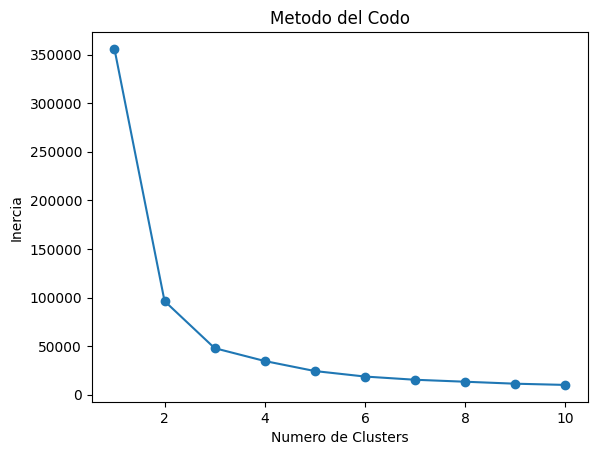

In [41]:
# Seleccionamos las columnas que vamos a utilizar para el clustering o agrupamiento
datosClustering = dfCrimenes[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

inercias = []

# Probamos diferentes valores de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(datosClustering)
    inercias.append(kmeans.inertia_)

# Graficamos los valores de las inercias
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Metodo del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('Inercia')
plt.show()

In [42]:
# Normalizamos los datos, significa ajustar las escalas de las características para que tengan una media de 0 y una desviación estándar de 1.
# Esto sirve para eliminar el sesgo, y tener un rango de valores consistentes
normalizador = StandardScaler()
datosNormalizados = normalizador.fit_transform(datosClustering)

# Aplicamos el algoritmo K-Means
# Utilizamos 4 clusters, como vemos en el grafico del codo utilizamos el punto en el que la disminucion de la inercia comienza a aplanarse
algoritmoKmeans = KMeans(n_clusters=4, random_state=42)
algoritmoKmeans.fit(datosNormalizados)

# Obteneemos las etiquetas de los clusteres y los centroides
etiquetasClusters = algoritmoKmeans.labels_
centroides = algoritmoKmeans.cluster_centers_

# Agregamos las etiquetas de los clusteres al dfCrimenes
dfCrimenes['Cluster'] = etiquetasClusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



La puntuación de silueta (silhouette score) cuantifica la cohesión y la separación de los clústeres. La puntuación de silueta varía entre -1 y 1. Un valor más cercano a 1 indica que los clústeres están bien definidos y son densos.

In [43]:
silueta = silhouette_score(datosNormalizados, etiquetasClusters)
print(f'Puntuación de silueta: {silueta}')

Puntuación de silueta: 0.33968891433344395


 la inercia es una medida de cuán cohesivos son los clústeres. Es la suma de las distancias al cuadrado de cada punto al centroide más cercano. La inercia es la suma de las distancias al cuadrado de cada punto al centroide más cercano. Cuanto más bajo sea el valor de la inercia, más compactos y cohesivos son los clústeres.

In [44]:
inercia = algoritmoKmeans.inertia_
print(f'Inercia: {inercia}')

Inercia: 57.55425863091105


 Aplicar PCA(Análisis de Componentes Principales) antes del clustering puede ser beneficioso para simplificar la representación de los datos, reducir la complejidad y facilitar la interpretación y visualización, lo que puede conducir a un mejor entendimiento de la estructura subyacente de los datos y a una mejor ejecución de los algoritmos de clustering. Al aplicar PCA tenemos una reducción de dimensionalidad, eliminación de correlaciones y facilita la visualizacion

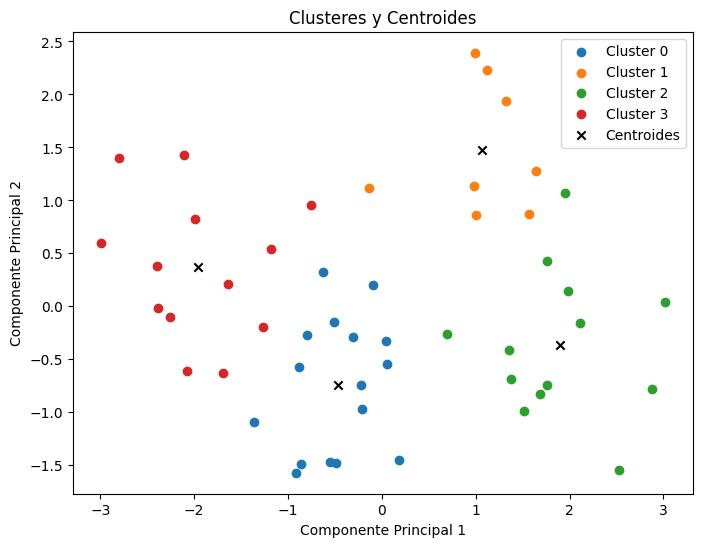

In [94]:
# Aplicamos PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datosNormalizados)

# Graficamos los clusters
plt.figure(figsize=(8, 6))

for cluster in range(4):
    plt.scatter(componentes_principales[dfCrimenes['Cluster'] == cluster][:, 0],
                componentes_principales[dfCrimenes['Cluster'] == cluster][:, 1],
                label=f'Cluster {cluster}')

# Graficamos los centroides de los clusters
centroides_pca = pca.transform(algoritmoKmeans.cluster_centers_)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='x', color='black', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusteres y Centroides')
plt.legend()
plt.show()

In [46]:
# Obtenemos la abreviatura de cada estado de EE. UU.
abreviatura = {state.name: state.abbr for state in us.states.STATES}

# Asignamos la abreviatura de estado a cada fila del DataFrame
dfCrimenes['Abreviatura del estado'] = dfCrimenes['Estado'].map(abreviatura)

dfCrimenes.head(10)

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Abreviatura del estado
0,Alabama,13.2,236,58,21.2,1,AL
1,Alaska,10.0,263,48,44.5,2,AK
2,Arizona,8.1,294,80,31.0,2,AZ
3,Arkansas,8.8,190,50,19.5,1,AR
4,California,9.0,276,91,40.6,2,CA
5,Colorado,7.9,204,78,38.7,2,CO
6,Connecticut,3.3,110,77,11.1,0,CT
7,Delaware,5.9,238,72,15.8,0,DE
8,Florida,15.4,335,80,31.9,2,FL
9,Georgia,17.4,211,60,25.8,1,GA


In [93]:
# Calculamos las medias de las caracteristicas de cada cluster
mediaClusters = dfCrimenes.groupby('Cluster')[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].mean().reset_index()

caracteristicas = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']
colores = ['blue', 'orange', 'green', 'red']


# Creamos un grafico de barras para comparar las medias de cada cluster para cada característica
for i, caracteristica in enumerate(caracteristicas):
    fig = px.bar(mediaClusters, x='Cluster', y=caracteristica,
                 title=f'Media de {caracteristica} por Cluster',
                 labels={'Cluster': 'Clusters', caracteristica: f'Media de {caracteristica}'},
                 color_discrete_sequence=[colores[i]])

    fig.update_xaxes(tickvals=mediaClusters['Cluster'], ticktext=[f'Cluster {i}' for i in mediaClusters['Cluster']])
    fig.update_traces(texttemplate='%{y}', insidetextanchor='end')
    fig.show()

Cluster 0: Este cluster tiene un nivel medio de asesinatos y asaltos, con una poblacion urbana mas alta en comparacion con otros clusters. Las tasas de violaciones tambien son significativas.

Cluster 1: Este cluster tiene una media alta de asesinatos y asaltos, con una poblacion urbana relativamente baja. Las tasas de violaciones tambien son altas.

Cluster 2: Este cluster muestra niveles medios a altos en asesinatos, asaltos y poblacion urbana. Las tasas de violaciones tambien son considerables.

Cluster 3: Este cluster tiene la poblacion urbana mas baja, y las medias de criminalidad mas baja

In [92]:
etiquetasRiesgo = ['Medio', 'Alto', 'Medio-Alto', 'Bajo']

# Realizamos el mapeo de los valores en de los cluster a los indices de los etiquetas de Riesgo
valores_cluster = dfCrimenes['Cluster']
mapeo_clusters = {i: etiquetasRiesgo[int(i)] for i in valores_cluster}


# Graficamos el mapa
fig = px.choropleth(locations=dfCrimenes['Abreviatura del estado'], color=dfCrimenes['Cluster'],
                    locationmode="USA-states", scope="usa",
                    color_discrete_map=mapeo_clusters)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='rgba(0,0,0,0)'))

# Creamos una leyenda personalizada con los niveles de riesgo
leyenda_personalizada = {str(i): etiquetasRiesgo[i] for i in range(len(etiquetasRiesgo))}

fig.update_layout(coloraxis_colorbar=dict(
    title='Niveles de Riesgo',
    tickmode='array',
    tickvals=list(leyenda_personalizada.keys()),
    ticktext=list(leyenda_personalizada.values()),
    ticks='outside'
))

fig.show()